# The Support Vector Machine (SVM) Algorithm
### and Grid Search

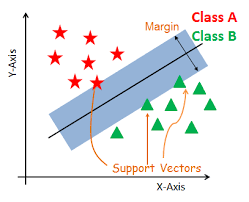

The Support Vector Machine (SVM) algorithm is a supervised machine learning model used for classification and regression tasks. It is particularly effective in high-dimensional spaces and situations where the number of dimensions exceeds the number of samples. The primary goal of SVM is to find the best separating hyperplane that divides the dataset into classes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PyQt5 
%matplotlib qt

In [2]:
WinData=pd.read_csv("RedWineQuality.csv")

In [3]:
WinData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
WinData.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [5]:
WinData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
WinData.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
WinData.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
cor=WinData.corr()
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)

<AxesSubplot:>

In [9]:
x=WinData.drop(['quality'],axis=1)

y=WinData['quality']

In [10]:
# normalization
from sklearn.preprocessing import StandardScaler
scmodel=StandardScaler()
X=scmodel.fit_transform(x)

In [11]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

print("X_train:",X_train.shape," , Y_train:",y_train.shape)
print("X_test:",X_test.shape," , Y_test:",y_test.shape)

# Create an SVM classifier
# from sklearn.svm import SVC  # SVC:Support Vector classification & SVR: Support Vector Regresion

#from sklearn import svm
# rbfmodel = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
# polymodel = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)
# SVMModel = svm.SVC().fit(X_train, y_train)

from sklearn.svm import SVC
SVMModel=SVC(kernel='rbf')
SVMModel.fit(X_train,y_train)

# Make predictions
# poly_pred = polymodel.predict(X_test)
# rbf_pred = rbfmodel.predict(X_test)
SVM_pred=SVMModel.predict(X_test)


# Calculate accuracy
from sklearn.metrics import accuracy_score,f1_score

svm_accuracy = accuracy_score(y_test,SVM_pred)
svm_f1 = f1_score(y_test, SVM_pred, average='weighted')
print('Accuracy SVM : ', "%.2f" % (svm_accuracy*100))
print('F1 SVM: ', "%.2f" % (svm_f1*100))

# print("-"*30)
# rbf_accuracy = accuracy_score(y_test, rbf_pred)
# rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
# print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
# print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))


X_train: (959, 11)  , Y_train: (959,)
X_test: (640, 11)  , Y_test: (640,)
Accuracy SVM :  60.16
F1 SVM:  57.54


In [13]:
from sklearn.metrics import confusion_matrix,classification_report
# print("Evaluation Metrics For SVM (PolyModel): \n")
# print(f"confusion matrix:\n{confusion_matrix(y_test,poly_pred)}")
# print("."*30)
# print(f"classification report:\n{classification_report(y_test,poly_pred)}")
# print("-"*60)
# print(f"SVM score :{polymodel.score(X_test,y_test)}")


print("Evaluation Metrics For SVM : \n")
confus=confusion_matrix(y_test,SVM_pred)
print(f"confusion matrix:\n{confus}")
sns.heatmap(confus,annot=True)

print("."*30)
print(f"classification report:\n{classification_report(y_test,SVM_pred)}")
print("-"*60)
print(f"SVM score :{SVMModel.score(X_test,y_test)}")

Evaluation Metrics For SVM : 

confusion matrix:
[[  0   1   3   1   0   0]
 [  0   0  16   6   0   0]
 [  0   2 202  67   4   0]
 [  0   0  65 164  17   0]
 [  0   0   4  59  19   0]
 [  0   0   0   7   3   0]]
..............................
classification report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        22
           5       0.70      0.73      0.72       275
           6       0.54      0.67      0.60       246
           7       0.44      0.23      0.30        82
           8       0.00      0.00      0.00        10

    accuracy                           0.60       640
   macro avg       0.28      0.27      0.27       640
weighted avg       0.56      0.60      0.58       640

------------------------------------------------------------
SVM score :0.6015625


c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [ ]:
# print("Evaluation Metrics For SVM (RBFModel): \n")
# print(f"confusion matrix:\n{confusion_matrix(y_test,rbf_pred)}")
# print("."*30)
# print(f"classification report:\n{classification_report(y_test,rbf_pred)}")
# print("."*30)
# print(f"SVM score :{rbfmodel.score(X_test,y_test)}")

In [ ]:
# df_poly=pd.DataFrame({'Labels':y_test,"Predictions_poly":poly_pred})
# print('df_poly:\n',df_poly)
# df_rbf=pd.DataFrame({'Labels':y_test,"Predictions_RBF":rbf_pred})
# print('df_rbf:\n',df_rbf)



In [14]:
# k-fold cross-validation
from sklearn.model_selection import cross_val_score
crosVal=cross_val_score(estimator=SVMModel,X=X_train,y=y_train,cv=10)
print(f"Accuracy :{(crosVal.mean()*100)}%")

c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Accuracy :61.63486842105264%


# Grid Search

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
params = {'C': [0.1, 1, 10, 100],'gamma': [0.01, 0.1, 1, 10],'kernel':['linear']}
#param_grid=[{'C': [0.1, 1, 10, 100],'gamma': [0.01, 0.1, 1, 10],'kernel':['linear']},
#            {'C': [0.1, 1, 10, 100],'kernel':['rbf']}]



# Instantiate the GridSearchCV object
# grid_search = GridSearchCV(svm, param_grid, cv=5)
grid=GridSearchCV(estimator=SVMModel,param_grid=params,refit=True,scoring='accuracy',cv=10)


# Fit the GridSearchCV object to the training data
# grid_search.fit(X, y)
grid.fit(X, y)

print("Best hyperparameters:", grid.best_params_)
print("Best accuracy score:", grid.best_score_)

pred=grid.predict(X_test)
print("grid score:", grid.score(X_test,y_test))

Best hyperparameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Best accuracy score: 0.5734866352201258
grid score: 0.5828125
